In [5]:
#¿Cuantos medidas se tomaron: N=?
N=102
#GRAFICAS PARA COMPARAR PICOS (UV-VIS; RAMAN)
import numpy as np
import os
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
import csv
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
from decimal import Decimal
import scipy
from scipy.interpolate import interp1d
from scipy.signal import find_peaks, peak_prominences


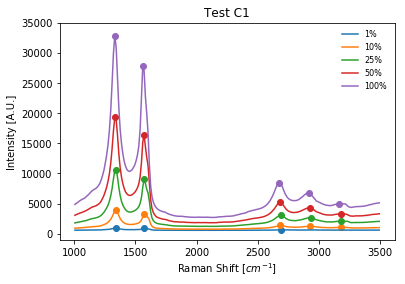

In [9]:
#Creamos la grafica del raw data, con la linea base y ya sin la linea base.
pyplot.ion()
fig=pyplot.figure()
pyplot.subplots_adjust(hspace=0.8)

ax1=fig.add_subplot(1,1,1)
ax1.set_ylabel('Intensity [A.U.]')
ax1.set_xlabel('Raman Shift [$cm^{-1}$]')
ax1.set_title('Test C1')


#INICIA LA LECTURA DE TODOS LOS ARCHIVOS
for i in range(N):
    if os.path.isfile('EEG-A_'+str(i)+'%'+'.txt')== False:
        i=i+1 # secuencia para que el programa continue aunque no encuetre un archivo con ese nombre
    else:
        data=np.genfromtxt('EEG-A_'+str(i)+'%'+'.txt', dtype = str)
        
        a=[float(row[0]) for row in data]
        b=[float(row[1]) for row in data]
        
        a = np.asarray(a)#raman shift
        b = np.asarray(b)#intensity 
        
        peaks = find_peaks(b,prominence=50)[0]
        y=[b[j] for j in peaks]
        x=[a[j] for j in peaks]
        #print(x)
        #print(y)
                
        
        etiqueta= str(i)+'%'
        ax1.plot(a, b, label=etiqueta)
        ax1.scatter(x,y)
        fig.canvas.draw()
        ax1.legend(prop={'size': 8}, frameon=False)
           
    fig.savefig('Raman_C1.png',dpi=199)
